# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn('my warning')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
feature=[ "Age" , "EstimatedSalary"]

In [6]:
feature

['Age', 'EstimatedSalary']

In [7]:
x,y=dataset[feature] , dataset.Purchased

## Inspection of features

In [8]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [9]:
type(x)

pandas.core.frame.DataFrame

In [10]:
x.shape

(400, 2)

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
dtypes: int64(2)
memory usage: 6.3 KB


In [12]:
type(y)

pandas.core.series.Series

In [13]:
y.shape

(400,)

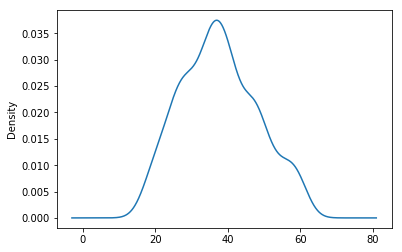

In [14]:
x.Age.plot(kind='density')

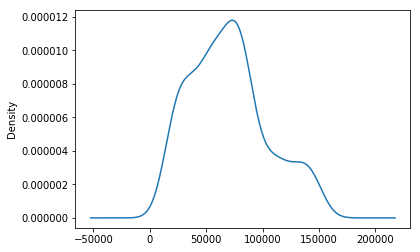

In [15]:
x.EstimatedSalary.plot(kind='density')

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Given classifiers

In [18]:
clf1 = LogisticRegression(random_state=0)
clf2 = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf3 = svm.SVC(kernel='linear', random_state=0)
clf4 = GaussianNB() #Naive Bayes
clf5 = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf6 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

## Fitting classifier to the Training set

In [19]:
clf1 = clf1.fit(x_train,y_train)
clf2 = clf2.fit(x_train,y_train)
clf3 = clf3.fit(x_train,y_train)
clf4 = clf4.fit(x_train,y_train)
clf5 = clf5.fit(x_train,y_train)
clf6 = clf6.fit(x_train,y_train)

# Predicting results

In [20]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)
y_pred4 = clf4.predict(x_test)
y_pred5 = clf5.predict(x_test)
y_pred6 = clf6.predict(x_test)

## Confusion Matrix for each classification

In [21]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [22]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [23]:
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [24]:
cm4 = confusion_matrix(y_test, y_pred4)
cm4

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [25]:
cm5 = confusion_matrix(y_test, y_pred5)
cm5

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [26]:
cm6 = confusion_matrix(y_test, y_pred6)
cm6

array([[63,  5],
       [ 4, 28]], dtype=int64)

# Checking Accuracy for each classifer

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.89

In [28]:
accuracy_score(y_test, y_pred2)

0.93

In [29]:
accuracy_score(y_test, y_pred3)

0.9

In [30]:
accuracy_score(y_test, y_pred4)

0.9

In [31]:
accuracy_score(y_test, y_pred5)

0.91

In [32]:
accuracy_score(y_test, y_pred6)

0.91

**From this result, we can see that two best accuracy outcomes are 91% for Decision tree and Random forest. However, we better plot them to see which one is final winner. From here, we have a tie**

# Visualizing the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


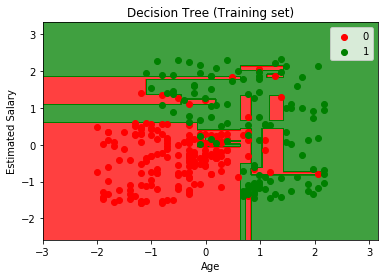

In [33]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j) 
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


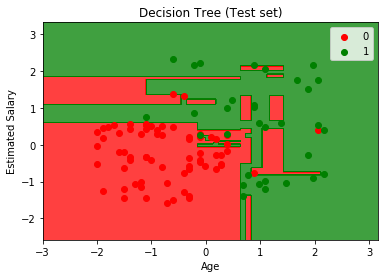

In [34]:
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**These results are not convincing enough. It seems a case of overfitting i.e classifier is too closely fit to a limited set of data points.**

# Visualizing the Training set results(Random Forest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


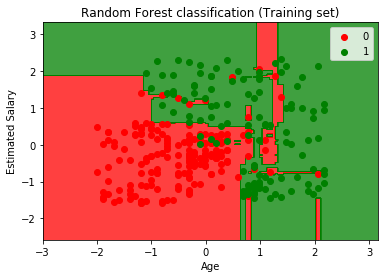

In [35]:
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualizing the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


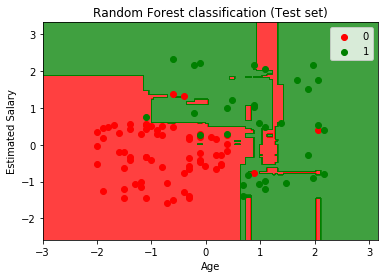

In [36]:
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**So Final winner is Random Forest as its plot seems to fit fine. And accuracy rate is 91%.** <br>

**Finally, this warning comes with updated version of plot in python. Am working on its fix**